# Parkinson's Disease - Hybrid Functional Petri Net (HFPN)
This script has implemented the following blocks of the HFPN for PD:
- [ ] Cholesterol homeostasis
- [ ] Calcium homeotasis
- [x] Energy metabolism
- [ ] Lewy bodies formation

Implemented data and parameter optimisation
- [ ] Cholesterol homeostasis
- [ ] Calcium homeotasis
- [ ] Energy metabolism
- [ ] Lewy bodies formation
- [ ] ER retraction

### Add your imports

In [1]:
import os
import sys

# Only run this cell once to avoid confusion with directories
# Point this to the directory where HFPN.py is relative to your working directory
cwd = os.getcwd() # Get current working directory
root_folder = os.sep + "team-project"
# Move to 'utils' from current directory position
sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "utils" + os.sep)

# Import HFPN class to work with hybrid functional Petri nets
from hfpn import HFPN

sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "parkinsons" + os.sep)
# Import initial token, firing conditions and rate functions
from initial_tokens import *
from rate_functions import *
from firing_conditions import *
from visualisation import Analysis

### Initialise an empty HFPN

In [2]:
# Initialize an empty HFPN
pn = HFPN(time_step = 0.01) #unit = s/A.U.

## Define the places by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Energy metabolism places

In [3]:

pn.add_place(it_p_cas3, "p_cas3","caspase 3 - mitochondria", continuous = True)
pn.add_place(initial_tokens=it_p_ATP, place_id="p_ATP", label="Conc of ATP in mito", continuous=True)

pn.add_place(initial_tokens=it_p_ADP, place_id="p_ADP", label="Conc of ADP in mito", continuous=True)

pn.add_place(initial_tokens=it_p_reduc_mito, place_id="p_reduc_mito", label="Conc of reducing agents (NADH, FADH) in mito", continuous=True)

pn.add_place(initial_tokens=it_p_ROS_mito, place_id="p_ROS_mito", label="Conc of ROS in mito", continuous=True)

pn.add_place(initial_tokens=it_p_H2O_mito, place_id="p_H2O_mito", label="Conc of H2O in mito", continuous=True)
# Places in other modules
pn.add_place(it_p_Ca_mito, "p_Ca_mito","Ca - mitochondria", continuous = True)
pn.add_place(it_p_chol_mito, "p_chol_mito", "Chol - mitochondria", continuous = True)
pn.add_place(it_p_LB, "p_LB", "Lewy body", continuous = True)
pn.add_place(it_p_Ca_ER, "p_Ca_ER", "Ca - ER", continuous = True)
pn.add_place(it_p_DJ1, "p_DJ1","DJ1 mutant", continuous = True)



## Define the transitions by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Energy metabolism transitions

In [4]:
# pn.add_transition(  transition_id = 't_krebs', 
#                     label = 'Krebs cycle', 
#                     input_place_ids = ['p_ADP', 'p_Ca_mito'],
#                     firing_condition = fc_t_krebs,
#                     consumption_speed_functions = [lambda a : k_t_krebs * a['p_ADP'] * a['p_Ca_mito'],
#                                                    lambda a : 0],
#                     output_place_ids = ['p_reduc_mito', 'p_ATP'],  
#                     production_speed_functions = [lambda a : k_t_krebs * a['p_ADP'] * a['p_Ca_mito'] * 4,
#                                                   lambda a : k_t_krebs * a['p_ADP'] * a['p_Ca_mito']])

# pn.add_transition(  transition_id = 't_ATP_hydro_mito', 
#                     label = 'ATP hydrolysis by cellular processes', 
#                     input_place_ids = ['p_ATP'],
#                     firing_condition = fc_t_ATP_hydro_mito,
#                     consumption_speed_functions = [lambda a : k_t_ATP_hydro_mito * a['p_ATP']],
#                     output_place_ids = ['p_ADP'],  
#                     production_speed_functions = [lambda a : k_t_ATP_hydro_mito * a['p_ATP']])

# pn.add_transition(  transition_id = 't_ETC', 
#                     label = 'Electron transport chain', 
#                     input_place_ids = ['p_reduc_mito', 'p_ADP', 'p_Ca_mito', 'p_chol_mito', 'p_ROS_mito'],
#                     firing_condition = fc_t_ETC,
#                     consumption_speed_functions = [lambda a : 22 / 3 * k_t_ETC * a['p_ADP'] * a['p_Ca_mito'] *  a['p_reduc_mito'] / a['p_chol_mito'] / a['p_ROS_mito']**0.5,
#                                                    lambda a : 22 * k_t_ETC * a['p_ADP'] * a['p_Ca_mito'] * a['p_reduc_mito'] / a['p_chol_mito']  / a['p_ROS_mito']**0.5,
#                                                    lambda a : 0,
#                                                    lambda a : 0,
#                                                    lambda a : 0],
#                     output_place_ids = ['p_ATP', 'p_ROS_mito'],  
#                     production_speed_functions = [lambda a : 22 * k_t_ETC * a['p_ADP'] * a['p_Ca_mito'] * a['p_reduc_mito'] / a['p_chol_mito']  / a['p_ROS_mito']**0.5,
#                                                   lambda a : 0.02 * 2 / 2 * 22 / 3 * k_t_ETC * a['p_ADP'] * a['p_Ca_mito'] * a['p_reduc_mito'] / a['p_chol_mito']  / a['p_ROS_mito']**0.5])
# print(k_t_ETC)
# pn.add_transition(  transition_id = 't_ROS_metab', 
#                     label = 'Oxidation of proteins/lipids involved in ETC', 
#                     input_place_ids = ['p_ROS_mito', 'p_chol_mito'],
#                     firing_condition = fc_t_ROS_metab,
#                     consumption_speed_functions = [lambda a : k_t_ROS_metab * a['p_ROS_mito'] / a['p_chol_mito'],
#                                                    lambda a : 0],
#                     output_place_ids = ['p_H2O_mito'],  
#                     production_speed_functions = [lambda a : k_t_ROS_metab * a['p_ROS_mito'] / a['p_chol_mito']])

pn.add_transition_with_speed_function(
                    transition_id = 't_ATP_hydro_mito',
                    label = 'ATP hydrolysis in mitochondria',
                    input_place_ids = ['p_ATP'],
                    firing_condition = fc_t_ATP_hydro_mito,
                    reaction_speed_function = r_t_ATP_hydro_mito,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_ADP'],         
                    production_coefficients = [1])
pn.add_transition_with_speed_function(
                    transition_id = 't_ROS_metab',
                    label = 'ROS neutralisation',
                    input_place_ids = ['p_ROS_mito','p_chol_mito','p_LB','p_DJ1'],
                    firing_condition = fc_t_ROS_metab,
                    reaction_speed_function = r_t_ROS_metab,
                    consumption_coefficients = [1,0,0,0], 
                    output_place_ids = ['p_H2O_mito'],         
                    production_coefficients = [1])
# #Link of krebs to calcium homeostasis
pn.add_transition_with_speed_function(
                    transition_id = 't_krebs',
                    label = 'Krebs cycle',
                    input_place_ids = ['p_ADP','p_Ca_mito'],
                    firing_condition = fc_t_krebs,
                    reaction_speed_function = r_t_krebs,
                    consumption_coefficients = [1,0], # Need to review this
                    output_place_ids = ['p_reduc_mito','p_ATP'],         
                    production_coefficients = [4,1])
#Link of ETC to calcium and cholesterol
pn.add_transition_with_speed_function(
                    transition_id = 't_ETC',
                    label = 'Electron transport chain',
                    input_place_ids = ['p_reduc_mito', 'p_ADP', 'p_Ca_mito', 'p_chol_mito','p_ROS_mito'],
                    firing_condition = fc_t_ETC,
                    reaction_speed_function = r_t_ETC,
                    consumption_coefficients = [22/3,22,0,0,0], # Need to review this
                    output_place_ids = ['p_ATP', 'p_ROS_mito'],         
                    production_coefficients = [22,0.02*2 / 2*22 / 3])

pn.add_transition_with_speed_function(
                    transition_id = 't_mito_dysfunc',
                    label = 'Mitochondrial complex 1 dysfunction',
                    input_place_ids = ['p_ROS_mito'],
                    firing_condition = fc_t_mito_dysfunc,
                    reaction_speed_function = r_t_mito_dysfunc,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_cas3'],         
                    production_coefficients = [1])
pn.add_transition_with_speed_function(
                    transition_id = 't_cas3_inact',
                    label = 'Caspase 3 degredation',
                    input_place_ids = ['p_cas3'],
                    firing_condition = fc_t_cas3_inact,
                    reaction_speed_function = r_t_cas3_inact,
                    consumption_coefficients = [1], # Need to review this
                    output_place_ids = [],         
                    production_coefficients = [])


## Run the network and plot a time evolution of the system

In [5]:
# pn.reset_network()

In [6]:
pn.run_many_times(number_runs=1, number_time_steps=100000) 

[[[1.30147584e+04 5.42000000e+09 5.42000000e+06 ... 0.00000000e+00
   1.80000000e+09 0.00000000e+00]
  [1.30147480e+04 5.41902601e+09 6.39398580e+06 ... 0.00000000e+00
   1.80000000e+09 0.00000000e+00]
  [1.30147377e+04 5.41807386e+09 7.34613562e+06 ... 0.00000000e+00
   1.80000000e+09 0.00000000e+00]
  ...
  [1.20180951e+04 5.26316959e+09 1.62250411e+08 ... 0.00000000e+00
   1.80000000e+09 0.00000000e+00]
  [1.20180855e+04 5.26319816e+09 1.62221842e+08 ... 0.00000000e+00
   1.80000000e+09 0.00000000e+00]
  [1.20180759e+04 5.26321424e+09 1.62205763e+08 ... 0.00000000e+00
   1.80000000e+09 0.00000000e+00]]]
37128.547601221595


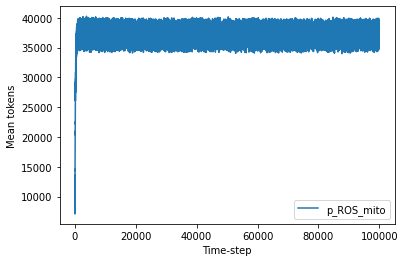

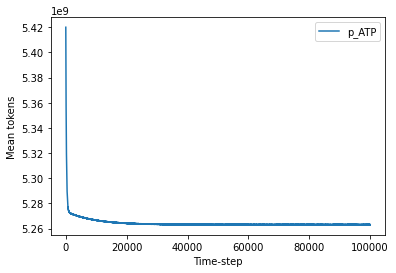

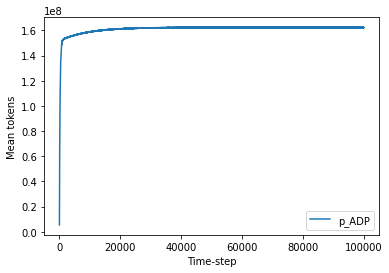

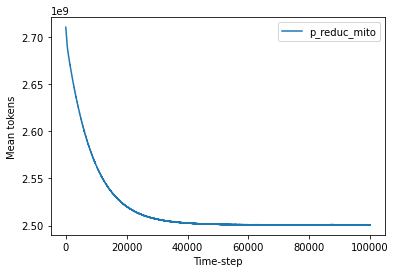

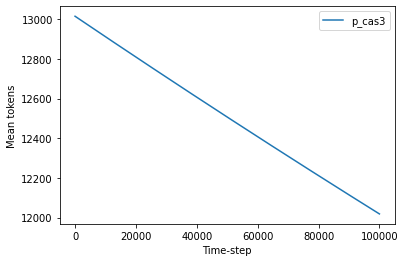

In [7]:
analysis = Analysis(pn)
# output_places=['p_RTN3_PN','p_RTN3_axon']
# output_places=['p_chol_LE']
import numpy as np
print(analysis.token_storage)
mean = np.mean(analysis.token_storage[:,50000:,analysis.place_dict["p_ROS_mito"]])
print(mean)
output_places=['p_ROS_mito']
analysis.mean_run_tokens_over_time(['p_ROS_mito'])
analysis.mean_run_tokens_over_time(['p_ATP'])
analysis.mean_run_tokens_over_time(['p_ADP'])
analysis.mean_run_tokens_over_time(['p_reduc_mito'])
analysis.mean_run_tokens_over_time(['p_cas3'])
# output_places=['p_SNCA_act']
# PDanalysis.mean_run_tokens_over_time(output_places)
# output_places=['p_SNCA_inact']
# PDanalysis.mean_run_tokens_over_time(output_places)
# output_places=['p_SNCA_olig']
# PDanalysis.mean_run_tokens_over_time(output_places)
# output_places=['p_LB']
# PDanalysis.mean_run_tokens_over_time(output_places)

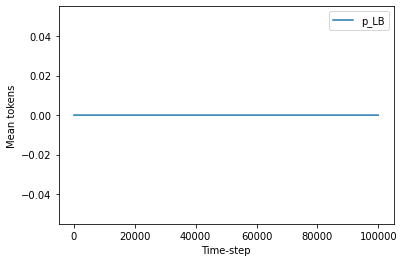

In [8]:
analysis.mean_run_tokens_over_time(['p_LB'])